In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os.path as op
import os

bids_folder = '/Users/mrenke/data/ds-dnumrisk'
sns.set_context('talk')


In [2]:
from utils import get_data

df= get_data(bids_folder)
print(len(df.index.unique('subject')))

number of subjects found: 66
66


In [3]:
df.head()

rt    n1    n2  choice  chose_n2      frac  \
subject run trial_nr                                                     
13      1   1         1.940046  14.0  11.0   False     False  0.785714   
            2         1.088813  14.0  15.0    True      True  1.071429   
            3         1.187995   7.0   8.0    True      True  1.142857   
            4         1.805343  14.0  10.0   False     False  0.714286   
            5         1.788309  10.0   6.0   False     False  0.600000   

                      log(n2/n1)   log(n1)  group  
subject run trial_nr                               
13      1   1          -0.241162  2.639057      1  
            2           0.068993  2.639057      1  
            3           0.133531  1.945910      1  
            4          -0.336472  2.639057      1  
            5          -0.510826  2.302585      1

In [5]:
df.index.unique(level='subject')

Int64Index([13, 14, 22, 25, 49, 40, 47, 24, 23, 15, 12, 46, 41, 48, 52, 55, 63,
            64, 30,  8, 37,  1, 39,  6, 62, 54, 53, 38,  7,  9, 36, 31, 44, 43,
            17, 28, 10, 26, 19, 21, 42, 45, 20, 27, 18, 11, 16, 29, 34, 33,  5,
             2, 56, 51, 58, 60,  3,  4, 32, 35, 61, 59, 50, 57],
           dtype='int64', name='subject')

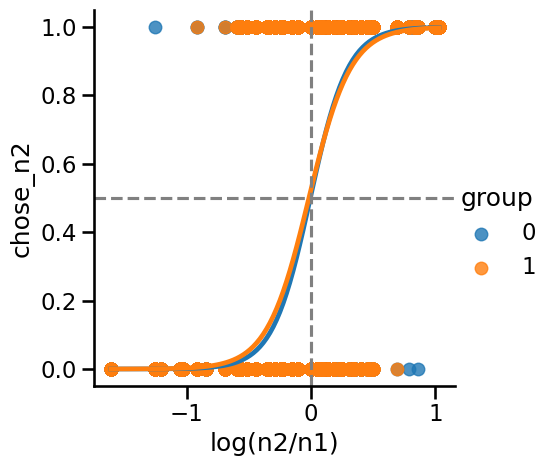

In [4]:
x_var = 'log(n2/n1)'
fig = sns.lmplot(df.reset_index(), x=x_var, y='chose_n2', hue='group',ci=95,  logistic=True)

for ax in fig.axes.flat:
    ax.axvline(x=0,color='grey', ls='--')
    ax.axhline(y=0.5,color='grey', ls='--')


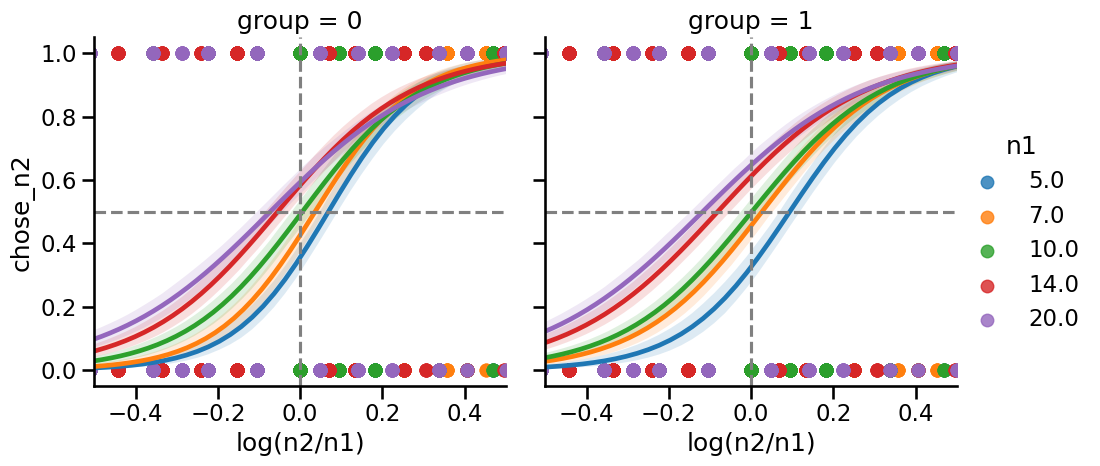

In [7]:
x_var = 'log(n2/n1)'
fig = sns.lmplot(df.reset_index(), x=x_var, y='chose_n2', hue= 'n1', col='group',ci=95,  logistic=True)

for ax in fig.axes.flat:
    ax.axvline(x=0,color='grey', ls='--')
    ax.axhline(y=0.5,color='grey', ls='--')
    ax.set_xlim(-.5,.5)

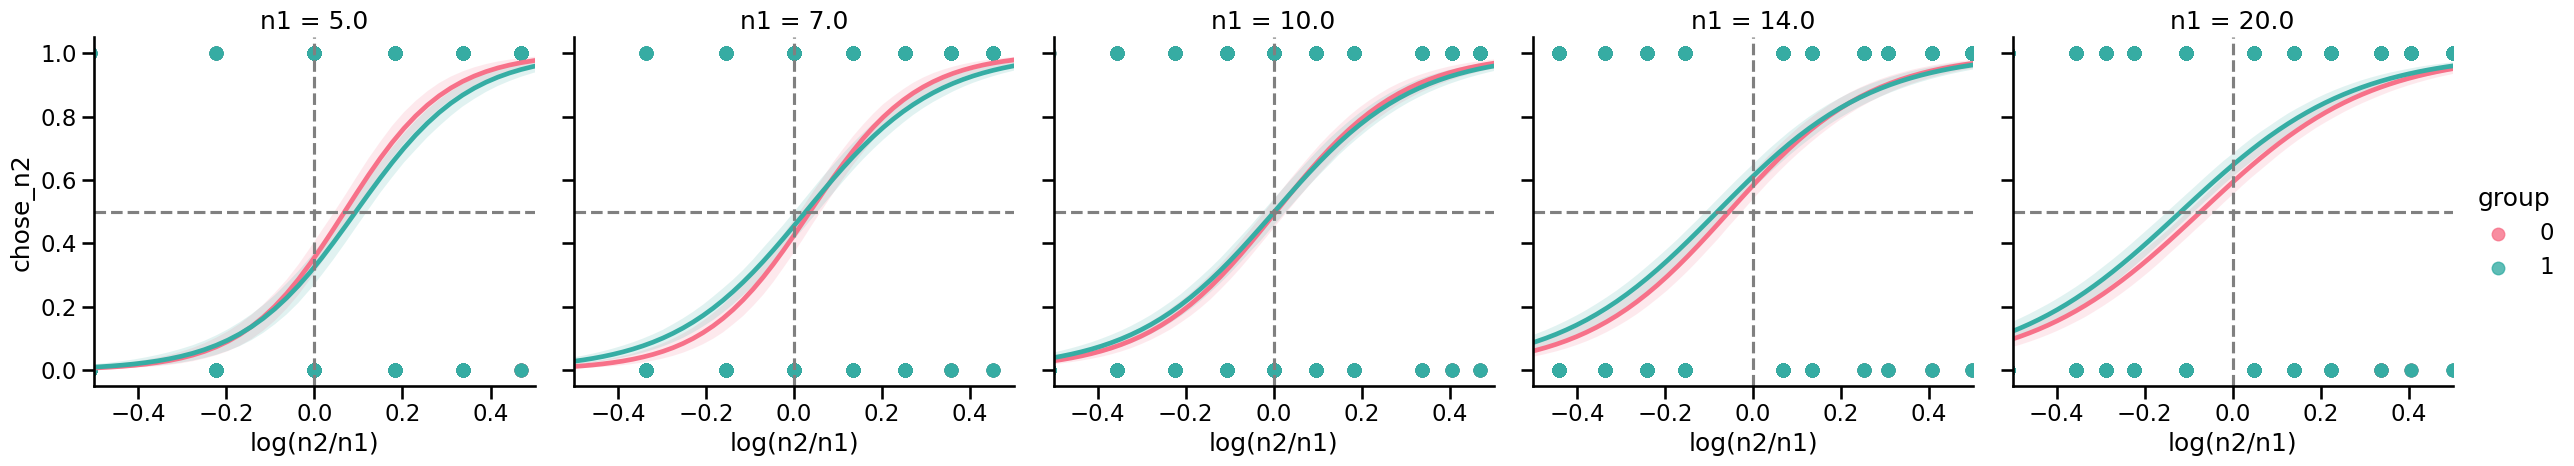

In [9]:
x_var = 'log(n2/n1)'
fig = sns.lmplot(df.reset_index(), x=x_var, y='chose_n2', hue= 'group', col= 'n1',ci=95,  logistic=True,  palette = 'husl')

for ax in fig.axes.flat:
    ax.axvline(x=0,color='grey', ls='--')
    ax.axhline(y=0.5,color='grey', ls='--')
    ax.set_xlim(-.5,.5)

### get subwise psychometric curves & save plots

In [13]:
# get subwise psychometric curves & save plots

# Ignore overflow RuntimeWarnings
import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)

target_folder = op.join(bids_folder, 'plots_and_ims', 'behavior_majduge')
x_var = 'log(n2/n1)'

for i, group in enumerate(['control','dyscalculic']):
    tmp = df[df['group']==i]
    fig = sns.lmplot(tmp.reset_index(), x=x_var, y='chose_n2',col = 'subject', ci=95,  logistic=True, col_wrap=5) #  hue='group',

    for ax in fig.axes.flat:
        ax.axvline(x=0,color='grey', ls='--')
        ax.axhline(y=0.5,color='grey', ls='--')
        ax.set_xlim(-0.8,.8)
    fig.fig.suptitle(group, fontsize=20)
    plt.savefig(op.join(target_folder, f'psymetCurves_{group}.pdf'))
    plt.close()

### look at number range effects

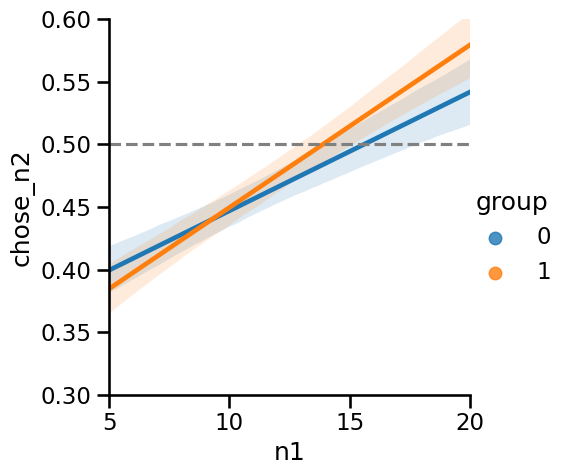

In [24]:
x_var = 'n1'
fig = sns.lmplot(df.reset_index(), x=x_var, y='chose_n2', hue='group',ci=95)

for ax in fig.axes.flat:
    ax.axvline(x=0,color='grey', ls='--')
    ax.axhline(y=0.5,color='grey', ls='--')
    ax.set_xlim(5,20)
    ax.set_ylim(0.3,0.6)

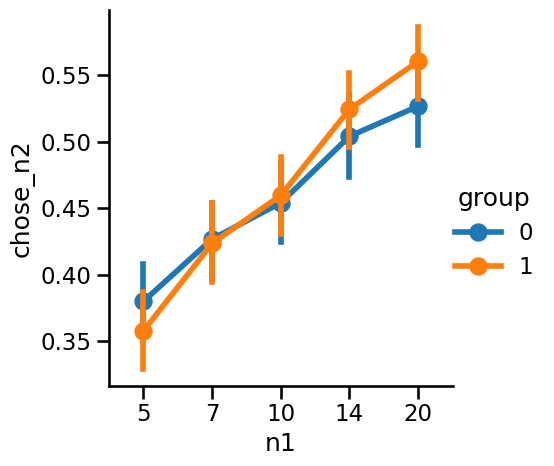

In [26]:
fig = sns.catplot(df.reset_index(), x=x_var, y='chose_n2', hue='group',kind='point')

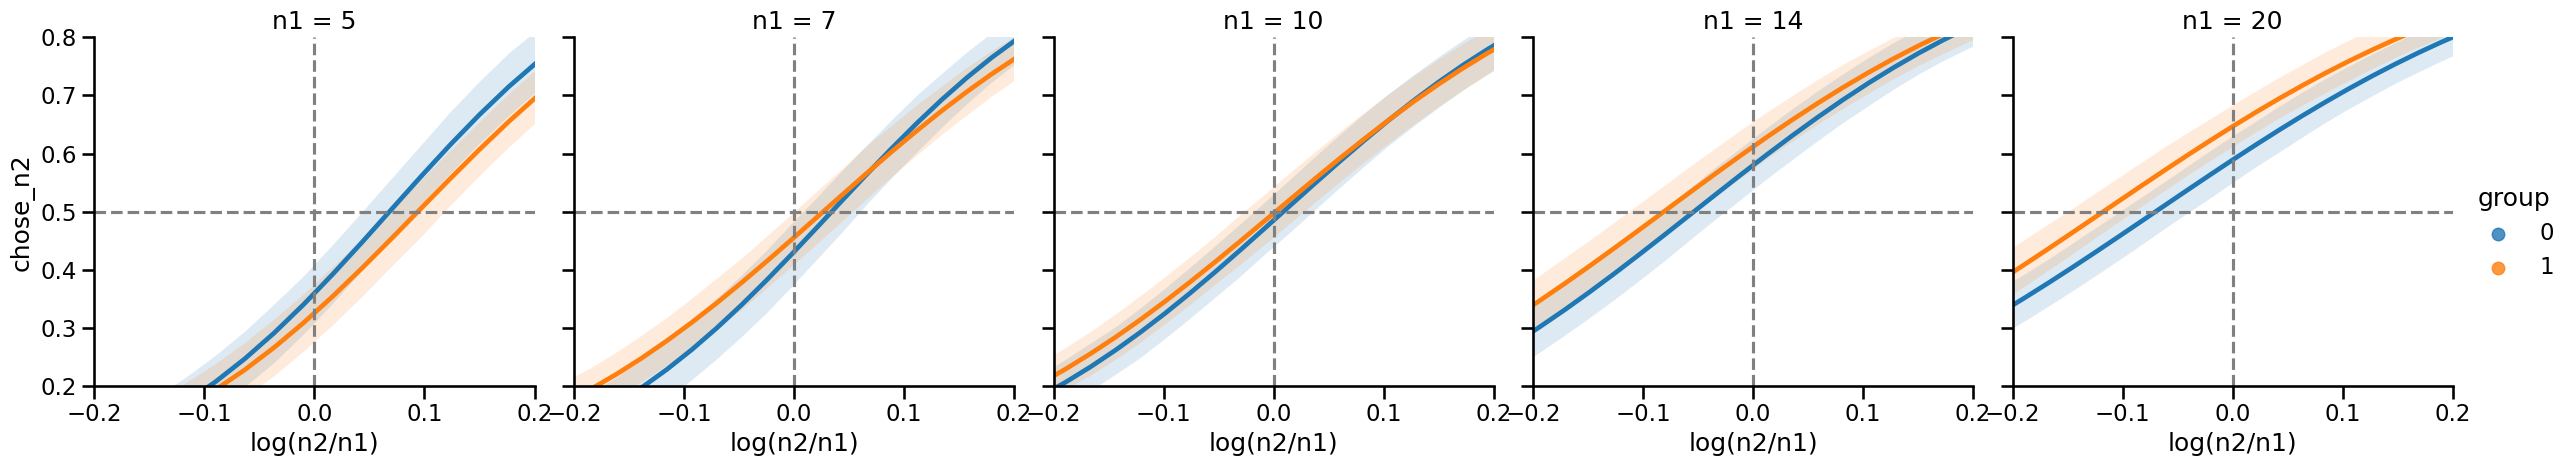

In [30]:
x_var = 'log(n2/n1)'
fig = sns.lmplot(df.reset_index(), x=x_var, y='chose_n2', hue='group',col = 'n1', ci=95,  logistic=True)

for ax in fig.axes.flat:
    ax.axvline(x=0,color='grey', ls='--')
    ax.axhline(y=0.5,color='grey', ls='--')
    ax.set_xlim(-.2,.2)
    ax.set_ylim(0.2,0.8)
    


## debug bauer model code


In [7]:
target_accept = 0.9
burnin=1000 
samples=1000


In [18]:
from bauer.models import MagnitudeComparisonRegressionModel

def build_model(model_label, df):
    if model_label == '1': # same priors = probit model ?!
        model = MagnitudeComparisonRegressionModel(df, 
                                    regressors = {'n1_evidence_sd':'group', 'n2_evidence_sd':'group', 
                                                  'prior_mu':'group','prior_sd':'group'},
                                    fit_prior=False,
                                    fit_seperate_evidence_sd = True, 
                                    #memory_model='independent',
                                    )
    return model       

In [ ]:
from bauer.models import MagnitudeComparisonModel

model = MagnitudeComparisonModel(df, fit_prior=True,fit_seperate_evidence_sd = True) # , memory_model='independent')
model.build_estimation_model()
#model_graph.model_to_graphviz(model=model.estimation_model)


trace = model.sample(burnin, samples, target_accept=target_accept)


In [14]:
df['n1'] = [int(n) for n in df['n1']]
df['n2'] = [int(n) for n in df['n2']]
df['choice'] = df['chose_n2']
df.head()


rt  n1  n2  choice  chose_n2      frac  \
subject run trial_nr                                                 
13      1   1         1.940046  14  11   False     False  0.785714   
            2         1.088813  14  15    True      True  1.071429   
            3         1.187995   7   8    True      True  1.142857   
            4         1.805343  14  10   False     False  0.714286   
            5         1.788309  10   6   False     False  0.600000   

                      log(n2/n1)   log(n1)  group  
subject run trial_nr                               
13      1   1          -0.241162  2.639057      1  
            2           0.068993  2.639057      1  
            3           0.133531  1.945910      1  
            4          -0.336472  2.639057      1  
            5          -0.510826  2.302585      1